# Email Phishing Detection - Time Series EDA

**Exploratory Data Analysis with Time Series Focus**

## Analysis Structure:
1. Regional Analysis - Phishing rate by timezone region
2. Temporal Distributions - Year, Month, Weekday, Hour patterns
3. Sender Behavior Profiling - Volume, bursts, and temporal patterns
4. Cross-dimensional Analysis - Region × Time heatmaps
5. Statistical Summary - Comparative statistics

---

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [20]:
# Load cleaned data
file_path = "cleaned_date_merged_data.csv"

df = pd.read_csv(file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

print("="*80)
print("DATA LOADED")
print("="*80)
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"\n📋 Columns: {df.columns.tolist()}")
print(f"\n🏷️ Label Distribution:")
print(df['label'].value_counts())
print(f"\n📈 Phishing Rate: {df['label'].mean()*100:.2f}%")

# Display first few rows
df.head()

DATA LOADED

📊 Dataset Shape: (48803, 16)

📋 Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls', 'timezone_hours', 'timezone_region', 'year', 'month', 'day', 'hour', 'day_of_week', 'day_name', 'is_weekend']

🏷️ Label Distribution:
label
1    27406
0    21397
Name: count, dtype: int64

📈 Phishing Rate: 56.16%


,sender,receiver,date,subject,body,label,urls,timezone_hours,timezone_region,year,month,day,hour,day_of_week,day_name,is_weekend
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,2008-08-06 07:31:02,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,-7.00,Americas,2008,8,6,7,2,Wednesday,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,2008-08-06 07:31:03,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,-5.00,Americas,2008,8,6,7,2,Wednesday,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,2008-08-06 16:28:00,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,-12.00,Americas,2008,8,6,16,2,Wednesday,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,2008-08-06 07:31:20,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,-6.00,Americas,2008,8,6,7,2,Wednesday,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,2008-08-06 07:31:21,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,-4.00,Europe/Africa,2008,8,6,7,2,Wednesday,0


---
## 1. Regional Analysis
### Phishing Rate by Timezone Region

REGIONAL PHISHING STATISTICS
                        total_emails  phishing_count  phishing_rate
timezone_region                                                    
Middle East/South Asia          4776            4453           0.93
APAC                            2844            2175           0.76
Europe/Africa                  27446           16379           0.60
Americas                       12751            4328           0.34
Oceania/Pacific                  986              71           0.07


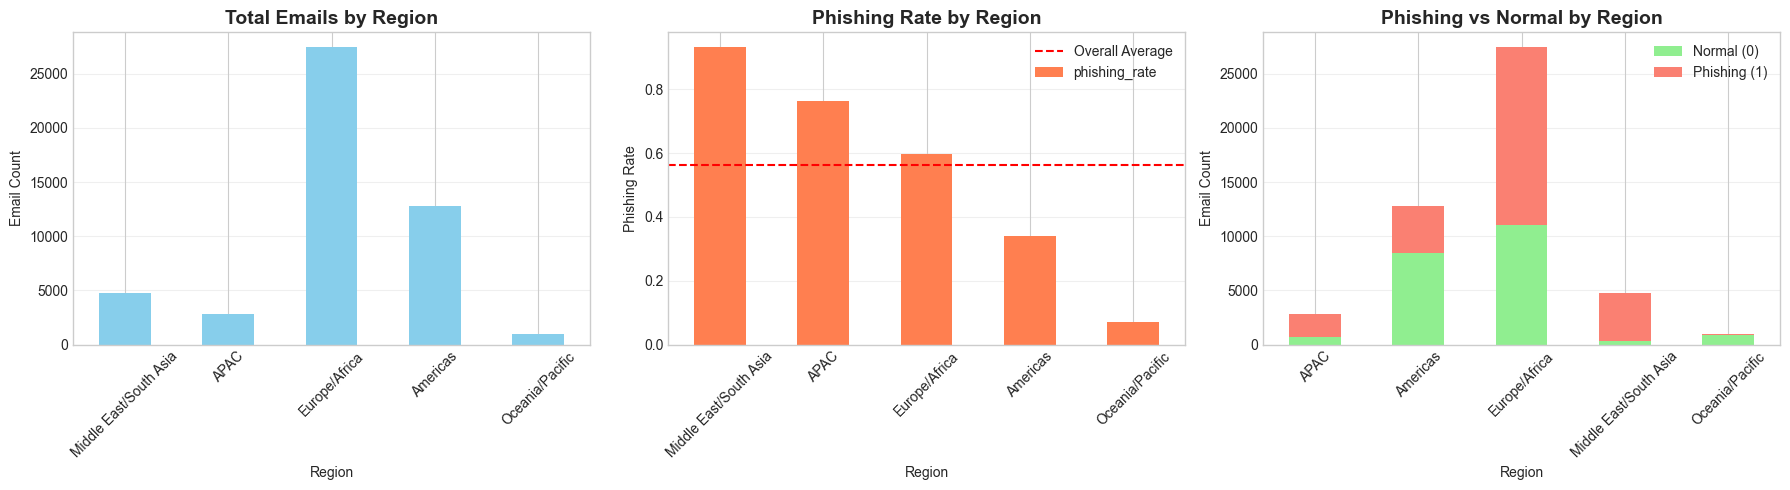


✅ Regional analysis complete!

=================================🔍 KEY INSIGHT =================================
Spammers concentrate in Middle East/South Asia (93% spam rate),
while normal senders prefer Americas/Oceania.


In [21]:
# Group by timezone region
regional_stats = df.groupby('timezone_region').agg({
    'label': ['count', 'sum', 'mean']
}).round(4)

regional_stats.columns = ['total_emails', 'phishing_count', 'phishing_rate']
regional_stats = regional_stats.sort_values('phishing_rate', ascending=False)

print("="*80)
print("REGIONAL PHISHING STATISTICS")
print("="*80)
print(regional_stats)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Total emails by region
regional_stats['total_emails'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Emails by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Email Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 2. Phishing rate by region
regional_stats['phishing_rate'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Phishing Rate by Region', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Phishing Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=df['label'].mean(), color='red', linestyle='--', label='Overall Average')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Stacked bar - Phishing vs Normal
region_label = df.groupby(['timezone_region', 'label']).size().unstack(fill_value=0)
region_label.plot(kind='bar', stacked=True, ax=axes[2], color=['lightgreen', 'salmon'])
axes[2].set_title('Phishing vs Normal by Region', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Email Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(['Normal (0)', 'Phishing (1)'])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Regional analysis complete!")
print("\n" + "🔍 KEY INSIGHT ".center(80, "="))
print("Spammers concentrate in Middle East/South Asia (93% spam rate),")
print("while normal senders prefer Americas/Oceania.")
print("="*80)

---
## 2. Temporal Distributions
### Year, Month, Weekday, Hour Patterns (Phishing vs Normal)

YEARLY TRENDS


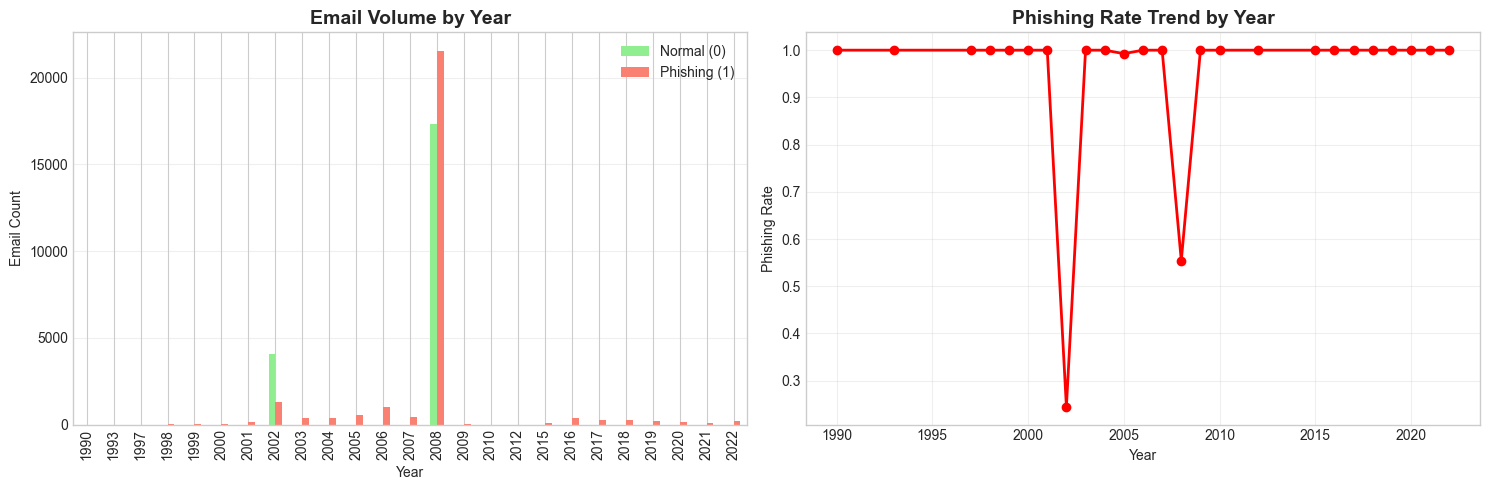

label      0      1
year               
1990       0      2
1993       0      1
1997       0      1
1998       0      7
1999       0      6
2000       0     34
2001       0    144
2002    4090   1326
2003       0    378
2004       0    406
2005       4    537
2006       0    990
2007       0    456
2008   17303  21535
2009       0     15
2010       0      1
2012       0      1
2015       0     69
2016       0    372
2017       0    250
2018       0    244
2019       0    203
2020       0    144
2021       0     93
2022       0    191

Phishing rate by year:
year
1990   1.00
1993   1.00
1997   1.00
1998   1.00
1999   1.00
2000   1.00
2001   1.00
2002   0.24
2003   1.00
2004   1.00
2005   0.99
2006   1.00
2007   1.00
2008   0.55
2009   1.00
2010   1.00
2012   1.00
2015   1.00
2016   1.00
2017   1.00
2018   1.00
2019   1.00
2020   1.00
2021   1.00
2022   1.00
Name: label, dtype: float64


In [22]:
# 2.1 YEARLY TRENDS
print("="*80)
print("YEARLY TRENDS")
print("="*80)

yearly_stats = df.groupby(['year', 'label']).size().unstack(fill_value=0)
yearly_rate = df.groupby('year')['label'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Volume by year
yearly_stats.plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Email Volume by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Email Count')
axes[0].legend(['Normal (0)', 'Phishing (1)'])
axes[0].grid(axis='y', alpha=0.3)

# Phishing rate by year
yearly_rate.plot(kind='line', ax=axes[1], marker='o', color='red', linewidth=2)
axes[1].set_title('Phishing Rate Trend by Year', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Phishing Rate')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(yearly_stats)
print(f"\nPhishing rate by year:")
print(yearly_rate)

MONTHLY PATTERNS


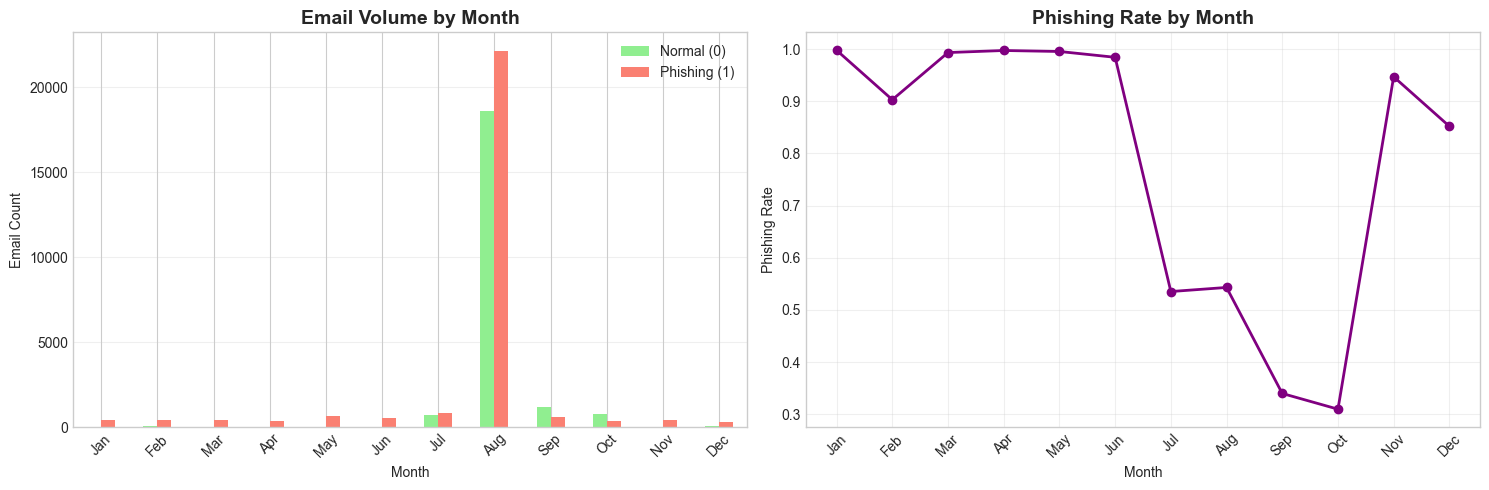

label      0      1
month              
1          1    419
2         44    409
3          3    442
4          1    356
5          3    636
6          9    559
7        718    827
8      18601  22110
9       1198    617
10       744    334
11        22    392
12        53    305

Phishing rate by month:
month
1    1.00
2    0.90
3    0.99
4    1.00
5    1.00
6    0.98
7    0.54
8    0.54
9    0.34
10   0.31
11   0.95
12   0.85
Name: label, dtype: float64


In [23]:
# 2.2 MONTHLY PATTERNS
print("="*80)
print("MONTHLY PATTERNS")
print("="*80)

monthly_stats = df.groupby(['month', 'label']).size().unstack(fill_value=0)
monthly_rate = df.groupby('month')['label'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Volume by month
monthly_stats.plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Email Volume by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Email Count')
axes[0].legend(['Normal (0)', 'Phishing (1)'])
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Phishing rate by month
monthly_rate.plot(kind='line', ax=axes[1], marker='o', color='purple', linewidth=2)
axes[1].set_title('Phishing Rate by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Phishing Rate')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(monthly_stats)
print(f"\nPhishing rate by month:")
print(monthly_rate)

WEEKDAY PATTERNS


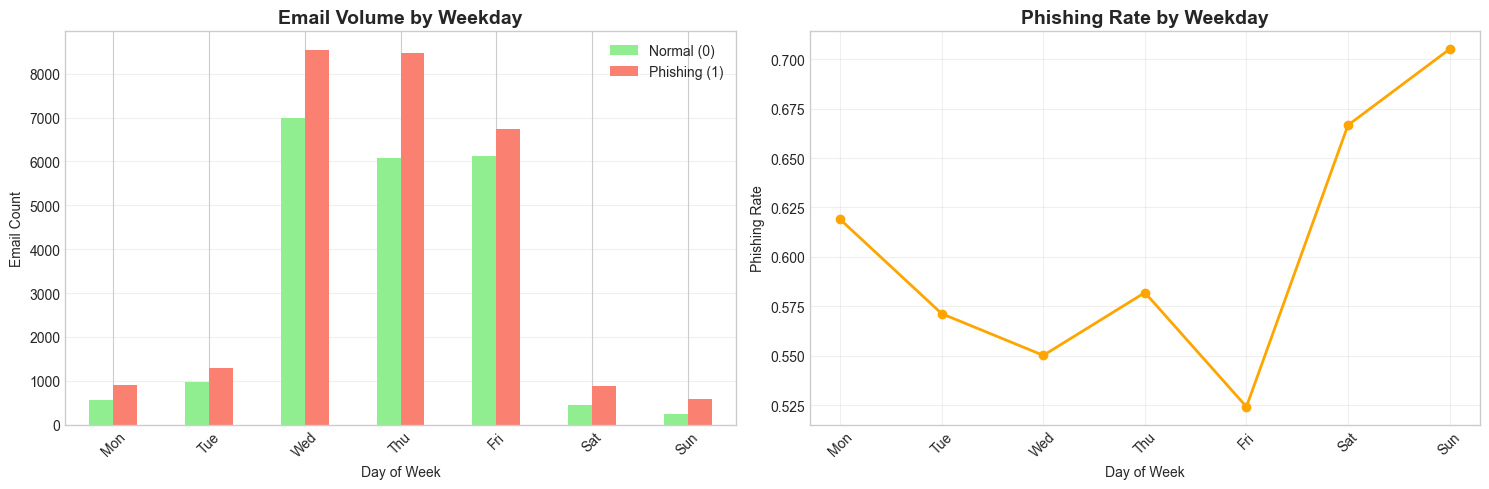

label           0     1
day_of_week            
0             551   895
1             975  1299
2            6981  8538
3            6087  8473
4            6122  6744
5             438   876
6             243   581

Phishing rate by weekday:
day_of_week
0   0.62
1   0.57
2   0.55
3   0.58
4   0.52
5   0.67
6   0.71
Name: label, dtype: float64

WEEKEND vs WEEKDAY COMPARISON
         Total Emails  Phishing Count  Phishing Rate
Weekday         46665           25949           0.56
Weekend          2138            1457           0.68

=================================🔍 KEY INSIGHT =================================
Spammers are 12% MORE active on weekends,
especially Sunday (71% spam rate).


In [24]:
# 2.3 WEEKDAY PATTERNS
print("="*80)
print("WEEKDAY PATTERNS")
print("="*80)

weekday_stats = df.groupby(['day_of_week', 'label']).size().unstack(fill_value=0)
weekday_rate = df.groupby('day_of_week')['label'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Volume by weekday
weekday_stats.plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Email Volume by Weekday', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Email Count')
axes[0].legend(['Normal (0)', 'Phishing (1)'])
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Phishing rate by weekday
weekday_rate.plot(kind='line', ax=axes[1], marker='o', color='orange', linewidth=2)
axes[1].set_title('Phishing Rate by Weekday', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Phishing Rate')
axes[1].set_xticks(range(0, 7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(weekday_stats)
print(f"\nPhishing rate by weekday:")
print(weekday_rate)

# Weekend vs Weekday
print("\n" + "="*80)
print("WEEKEND vs WEEKDAY COMPARISON")
print("="*80)
weekend_comparison = df.groupby('is_weekend')['label'].agg(['count', 'sum', 'mean'])
weekend_comparison.index = ['Weekday', 'Weekend']
weekend_comparison.columns = ['Total Emails', 'Phishing Count', 'Phishing Rate']
print(weekend_comparison)

print("\n" + "🔍 KEY INSIGHT ".center(80, "="))
print("Spammers are 12% MORE active on weekends,")
print("especially Sunday (71% spam rate).")
print("="*80)

HOURLY PATTERNS


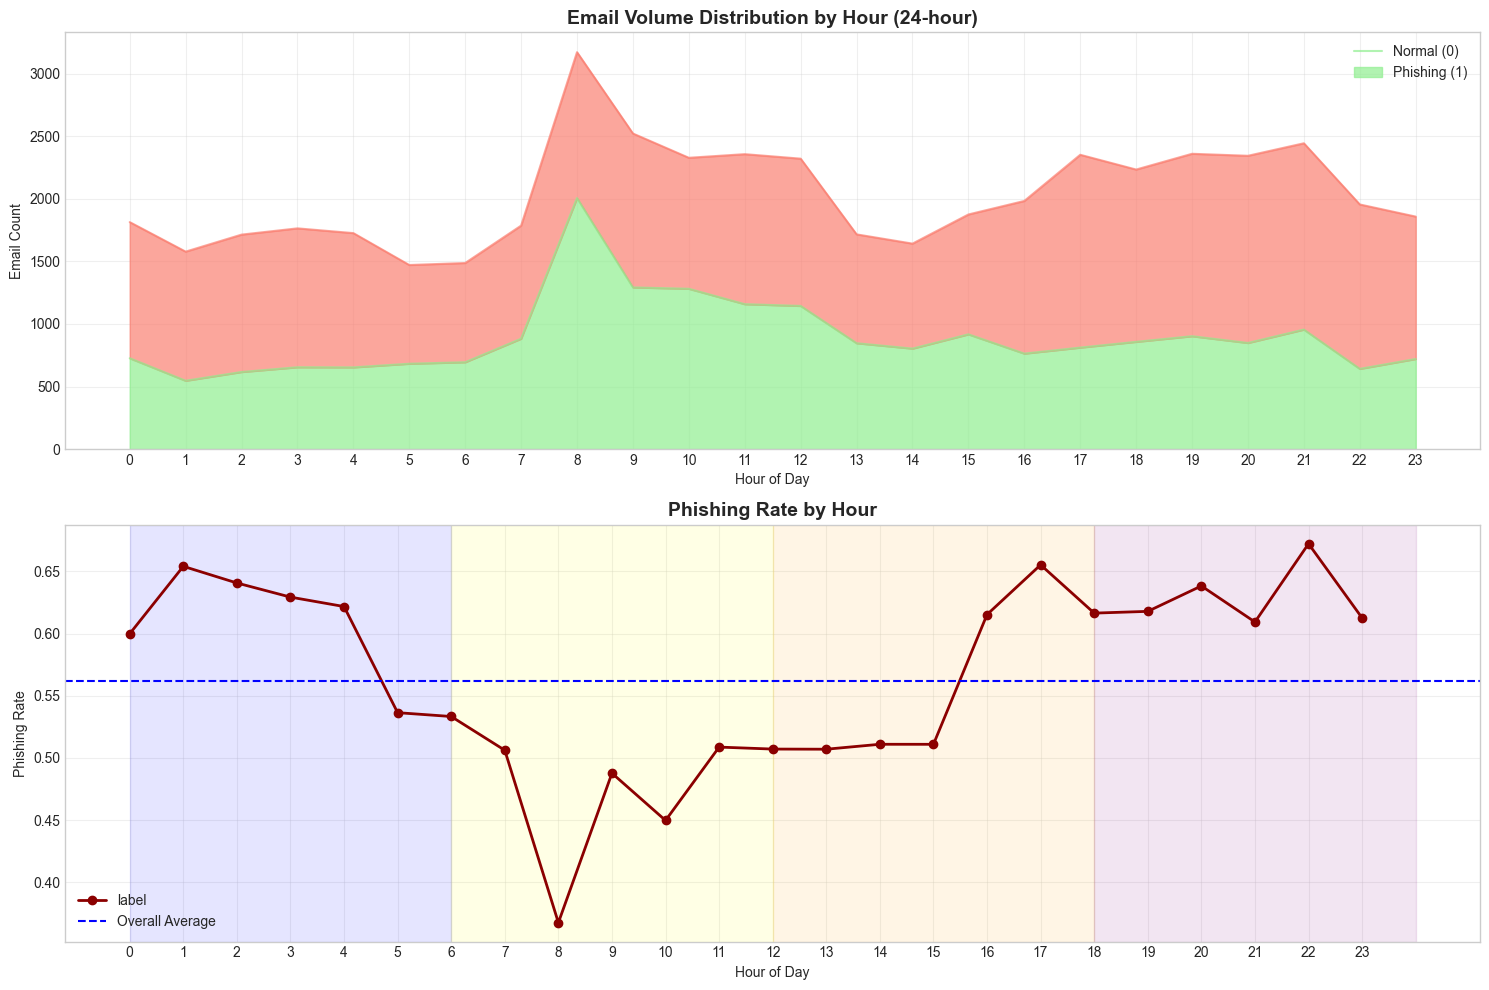

label     0     1
hour             
0       726  1088
1       546  1032
2       616  1098
3       654  1110
4       653  1073
5       682   789
6       694   793
7       882   904
8      2006  1166
9      1292  1230
10     1281  1047
11     1158  1199
12     1144  1177
13      846   870
14      803   839
15      917   958
16      763  1220
17      811  1541
18      857  1377
19      902  1458
20      848  1496
21      955  1489
22      641  1314
23      720  1138

Phishing rate by hour:
hour
0    0.60
1    0.65
2    0.64
3    0.63
4    0.62
5    0.54
6    0.53
7    0.51
8    0.37
9    0.49
10   0.45
11   0.51
12   0.51
13   0.51
14   0.51
15   0.51
16   0.62
17   0.66
18   0.62
19   0.62
20   0.64
21   0.61
22   0.67
23   0.61
Name: label, dtype: float64

PEAK HOURS ANALYSIS

🔥 Top 5 highest volume hours:
hour
8     3172
9     2522
21    2444
19    2360
11    2357
dtype: int64

⚠️ Top 5 highest phishing rate hours:
hour
22   0.67
17   0.66
1    0.65
2    0.64
20   0.64
Name: label, dty

In [25]:
# 2.4 HOURLY PATTERNS
print("="*80)
print("HOURLY PATTERNS")
print("="*80)

hourly_stats = df.groupby(['hour', 'label']).size().unstack(fill_value=0)
hourly_rate = df.groupby('hour')['label'].mean()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Volume by hour (stacked area)
hourly_stats.plot(kind='area', ax=axes[0], color=['lightgreen', 'salmon'], alpha=0.7)
axes[0].set_title('Email Volume Distribution by Hour (24-hour)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Email Count')
axes[0].legend(['Normal (0)', 'Phishing (1)'])
axes[0].set_xticks(range(0, 24))
axes[0].grid(alpha=0.3)

# Phishing rate by hour
hourly_rate.plot(kind='line', ax=axes[1], marker='o', color='darkred', linewidth=2)
axes[1].set_title('Phishing Rate by Hour', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Phishing Rate')
axes[1].set_xticks(range(0, 24))
axes[1].axhline(y=df['label'].mean(), color='blue', linestyle='--', label='Overall Average')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Add time blocks background
axes[1].axvspan(0, 6, alpha=0.1, color='blue', label='Night')
axes[1].axvspan(6, 12, alpha=0.1, color='yellow', label='Morning')
axes[1].axvspan(12, 18, alpha=0.1, color='orange', label='Afternoon')
axes[1].axvspan(18, 24, alpha=0.1, color='purple', label='Evening')

plt.tight_layout()
plt.show()

print(hourly_stats)
print(f"\nPhishing rate by hour:")
print(hourly_rate)

# Identify peak hours
print("\n" + "="*80)
print("PEAK HOURS ANALYSIS")
print("="*80)
print(f"\n🔥 Top 5 highest volume hours:")
print(hourly_stats.sum(axis=1).nlargest(5))
print(f"\n⚠️ Top 5 highest phishing rate hours:")
print(hourly_rate.nlargest(5))

print("\n" + "🔍 KEY INSIGHT ".center(80, "="))
print("Spammers send MORE at night (10 PM = 67% spam) and")
print("LESS during business hours (8 AM = 37% spam).")
print("="*80)

---
## 3. Sender Behavior Profiling
### Volume, Bursts, and Temporal Patterns

SENDER VOLUME DISTRIBUTION

📊 Sender Statistics:
  • Total unique senders: 30,756
  • Phishers (>50% phishing rate): 26,018
  • Normal senders (≤50% phishing rate): 4,738


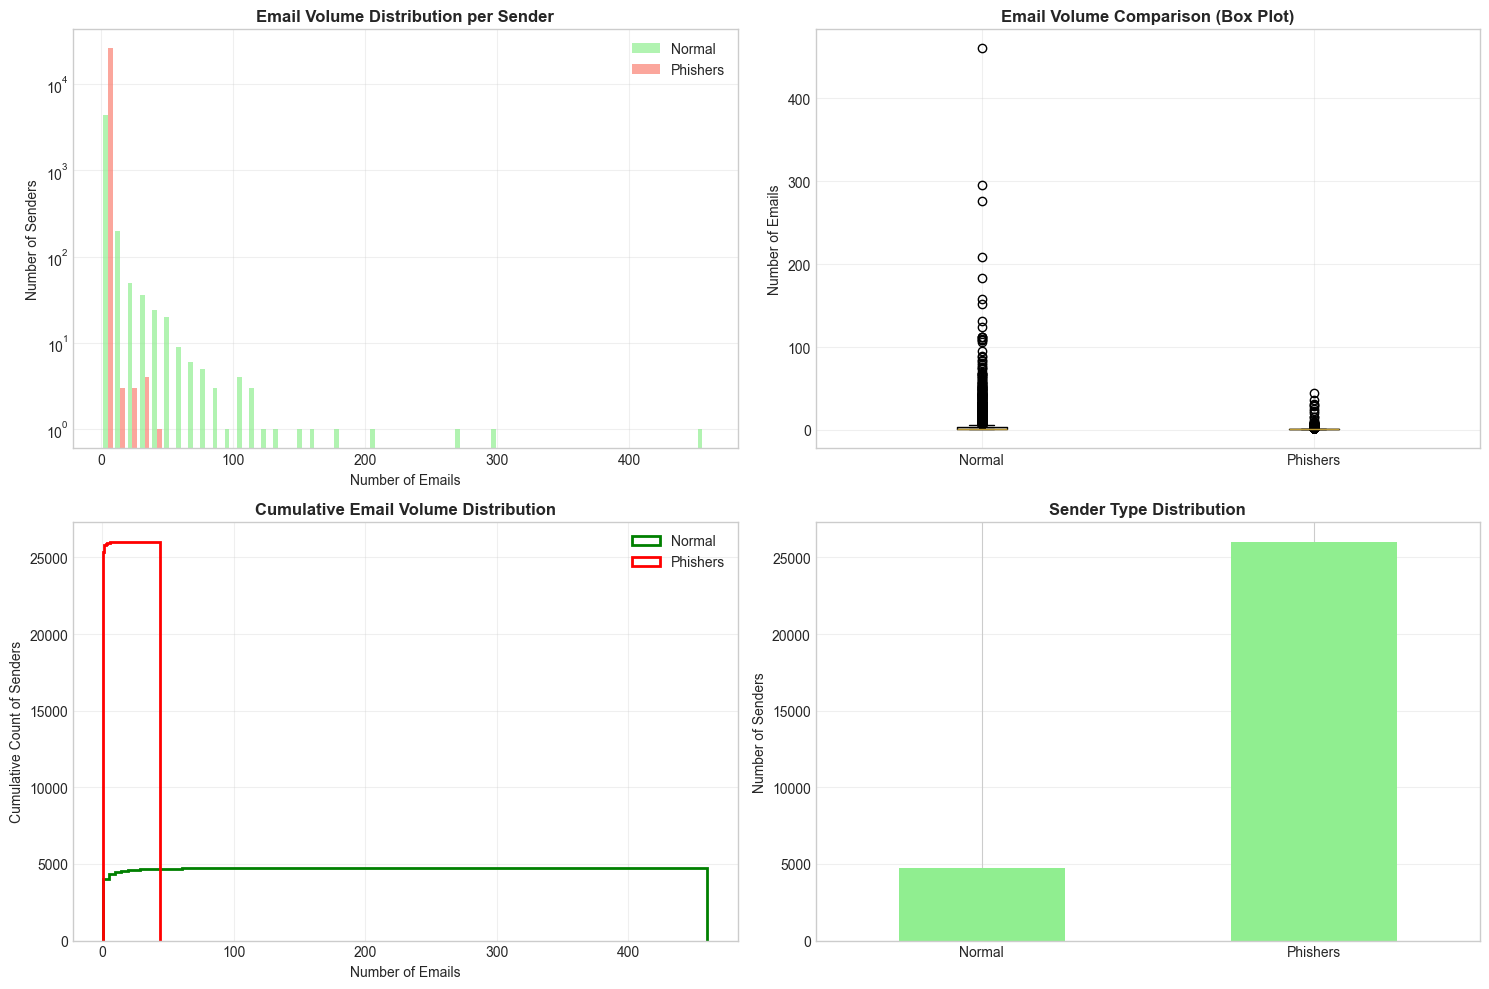


VOLUME STATISTICS

Normal Senders:
count   4738.00
mean       4.52
std       13.69
min        1.00
25%        1.00
50%        1.00
75%        3.00
max      460.00
Name: total_emails, dtype: float64

Phishers:
count   26018.00
mean        1.05
std         0.63
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        44.00
Name: total_emails, dtype: float64

================================🔍 KEY INSIGHTS =================================
* Spammers are 'one-and-done' - Average only 1.05 emails then disappear
* Normal senders are recurring - Average 4.52 emails, up to 460
* HIGH VOLUME = LIKELY LEGITIMATE - 96.6% of burst senders are normal!


In [26]:
# 3.1 EMAIL VOLUME DISTRIBUTION PER SENDER
print("="*80)
print("SENDER VOLUME DISTRIBUTION")
print("="*80)

# Group by sender and label
sender_stats = df.groupby(['sender', 'label']).size().reset_index(name='email_count')
sender_summary = df.groupby('sender').agg({
    'label': ['count', 'sum', 'mean'],
    'date': ['min', 'max']
})
sender_summary.columns = ['total_emails', 'phishing_count', 'phishing_rate', 'first_email', 'last_email']
sender_summary = sender_summary.reset_index()

# Separate phishers and normal senders
phishers = sender_summary[sender_summary['phishing_rate'] > 0.5]
normal_senders = sender_summary[sender_summary['phishing_rate'] <= 0.5]

print(f"\n📊 Sender Statistics:")
print(f"  • Total unique senders: {len(sender_summary):,}")
print(f"  • Phishers (>50% phishing rate): {len(phishers):,}")
print(f"  • Normal senders (≤50% phishing rate): {len(normal_senders):,}")

# Distribution comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Overall volume distribution
axes[0, 0].hist([normal_senders['total_emails'], phishers['total_emails']], 
                bins=50, label=['Normal', 'Phishers'], color=['lightgreen', 'salmon'], alpha=0.7)
axes[0, 0].set_title('Email Volume Distribution per Sender', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Emails')
axes[0, 0].set_ylabel('Number of Senders')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')
axes[0, 0].grid(alpha=0.3)

# 2. Box plot comparison
data_to_plot = [normal_senders['total_emails'], phishers['total_emails']]
axes[0, 1].boxplot(data_to_plot, labels=['Normal', 'Phishers'])
axes[0, 1].set_title('Email Volume Comparison (Box Plot)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Emails')
axes[0, 1].grid(alpha=0.3)

# 3. Cumulative distribution
axes[1, 0].hist(normal_senders['total_emails'], bins=100, cumulative=True, 
                histtype='step', label='Normal', linewidth=2, color='green')
axes[1, 0].hist(phishers['total_emails'], bins=100, cumulative=True, 
                histtype='step', label='Phishers', linewidth=2, color='red')
axes[1, 0].set_title('Cumulative Email Volume Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Emails')
axes[1, 0].set_ylabel('Cumulative Count of Senders')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Top sender types
sender_type_counts = pd.DataFrame({
    'Normal': [len(normal_senders)],
    'Phishers': [len(phishers)]
})
sender_type_counts.T.plot(kind='bar', ax=axes[1, 1], legend=False, color=['lightgreen', 'salmon'])
axes[1, 1].set_title('Sender Type Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Senders')
axes[1, 1].set_xticklabels(['Normal', 'Phishers'], rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*80)
print("VOLUME STATISTICS")
print("="*80)
print("\nNormal Senders:")
print(normal_senders['total_emails'].describe())
print("\nPhishers:")
print(phishers['total_emails'].describe())

print("\n" + "🔍 KEY INSIGHTS ".center(80, "="))
print("* Spammers are 'one-and-done' - Average only 1.05 emails then disappear")
print("* Normal senders are recurring - Average 4.52 emails, up to 460")
print("* HIGH VOLUME = LIKELY LEGITIMATE - 96.6% of burst senders are normal!")
print("="*80)

TIME GAP BETWEEN CONSECUTIVE EMAILS

Time Gap Statistics (in hours):

Normal Senders:
count   16664.00
mean       21.40
std       123.45
min         0.00
25%         0.07
50%         0.75
75%         5.42
max      4063.07
Name: time_gap_hours, dtype: float64

Phishers:
count     1383.00
mean       294.38
std       3758.47
min          0.00
25%          0.00
50%          0.02
75%          3.91
max     124632.55
Name: time_gap_hours, dtype: float64


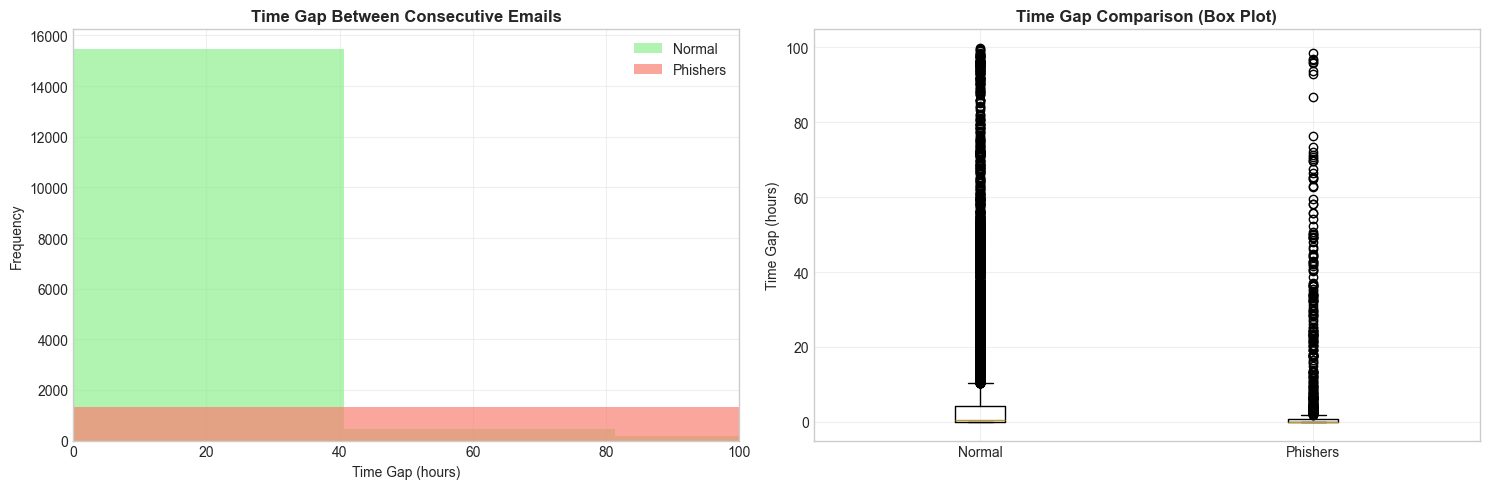


=================================🔍 KEY INSIGHT =================================
Spammers show bimodal pattern - Send in rapid bursts (median 1.2 min),
then disappear for long periods (avg 294 hours). Normal senders are
consistent (median 45 min, avg 21 hours).


In [ ]:
# 3.3 TIME GAP ANALYSIS
print("="*80)
print("TIME GAP BETWEEN CONSECUTIVE EMAILS")
print("="*80)

# Get time gaps for phishers vs normal
df_with_label = df_sorted.merge(sender_summary[['sender', 'phishing_rate']], on='sender')
df_with_label['sender_type'] = df_with_label['phishing_rate'].apply(lambda x: 'Phisher' if x > 0.5 else 'Normal')

# Filter out NaN gaps (first email from each sender)
time_gaps = df_with_label[df_with_label['time_gap_seconds'].notna()].copy()

# Convert to hours for easier interpretation
time_gaps['time_gap_hours'] = time_gaps['time_gap_seconds'] / 3600

# Statistics
print("\nTime Gap Statistics (in hours):")
print("\nNormal Senders:")
print(time_gaps[time_gaps['sender_type'] == 'Normal']['time_gap_hours'].describe())
print("\nPhishers:")
print(time_gaps[time_gaps['sender_type'] == 'Phisher']['time_gap_hours'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Time gap distribution (log scale)
time_gaps[time_gaps['sender_type'] == 'Normal']['time_gap_hours'].hist(
    bins=100, alpha=0.7, label='Normal', color='lightgreen', ax=axes[0])
time_gaps[time_gaps['sender_type'] == 'Phisher']['time_gap_hours'].hist(
    bins=100, alpha=0.7, label='Phishers', color='salmon', ax=axes[0])
axes[0].set_title('Time Gap Between Consecutive Emails', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time Gap (hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 100)
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Box plot comparison
# Filter extreme outliers for better visualization
time_gaps_filtered = time_gaps[time_gaps['time_gap_hours'] < 100]
normal_gaps = time_gaps_filtered[time_gaps_filtered['sender_type'] == 'Normal']['time_gap_hours']
phisher_gaps = time_gaps_filtered[time_gaps_filtered['sender_type'] == 'Phisher']['time_gap_hours']

axes[1].boxplot([normal_gaps, phisher_gaps], labels=['Normal', 'Phishers'])
axes[1].set_title('Time Gap Comparison (Box Plot)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Time Gap (hours)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "🔍 KEY INSIGHT ".center(80, "="))
print("Spammers show bimodal pattern - Send in rapid bursts (median 1.2 min),")
print("then disappear for long periods (avg 294 hours). Normal senders are")
print("consistent (median 45 min, avg 21 hours).")
print("="*80)

---
## 4. Cross-Dimensional Analysis
### Region × Time Heatmaps

REGION × HOUR ANALYSIS


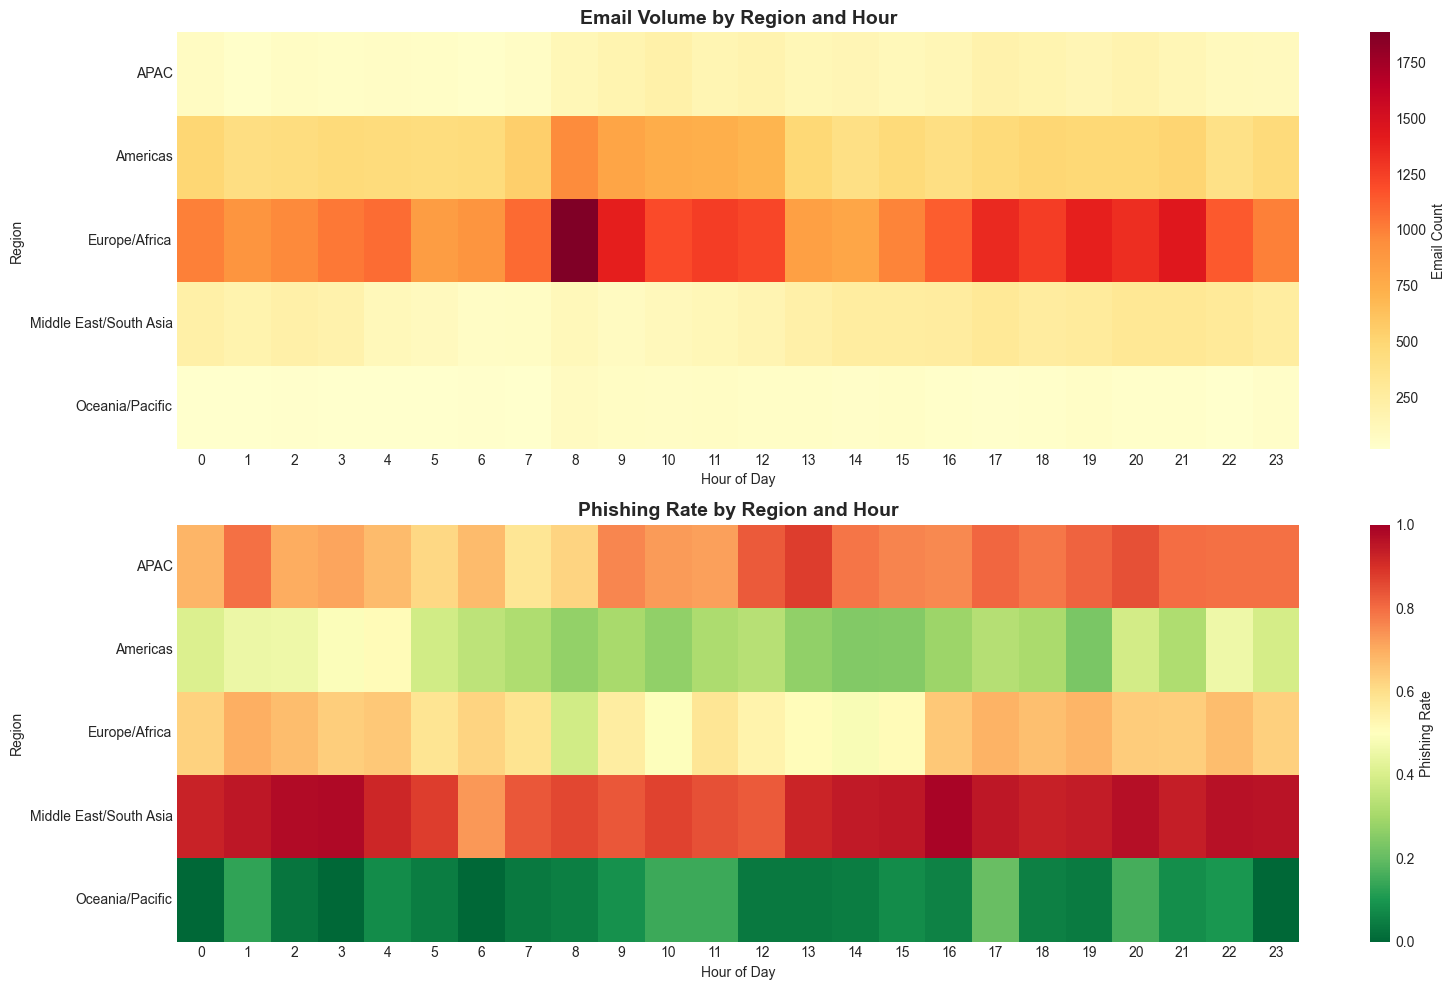


Email Volume by Region and Hour:
hour                      0    1    2     3     4    5    6     7     8   \
timezone_region                                                            
APAC                      73   39   67    56    58   52   40    62   133   
Americas                 497  427  439   466   452  446  451   551   957   
Europe/Africa           1001  908  965  1028  1075  852  906  1080  1884   
Middle East/South Asia   223  181  210   192   115   98   60    66   115   
Oceania/Pacific           20   23   33    22    26   23   30    27    83   

hour                      9     10    11    12   13   14   15    16    17  \
timezone_region                                                             
APAC                     166   204   155   178  136  145  115   139   194   
Americas                 801   749   735   704  487  404  469   416   467   
Europe/Africa           1403  1206  1263  1221  829  793  982  1128  1349   
Middle East/South Asia    84   108   135   164  

In [30]:
# 4.1 REGION × HOUR HEATMAP
print("="*80)
print("REGION × HOUR ANALYSIS")
print("="*80)

# Create pivot tables
region_hour_volume = df.pivot_table(values='label', index='timezone_region', 
                                     columns='hour', aggfunc='count', fill_value=0)
region_hour_rate = df.pivot_table(values='label', index='timezone_region', 
                                   columns='hour', aggfunc='mean', fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 1. Volume heatmap
sns.heatmap(region_hour_volume, annot=False, cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Email Count'})
axes[0].set_title('Email Volume by Region and Hour', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Region')

# 2. Phishing rate heatmap
sns.heatmap(region_hour_rate, annot=False, cmap='RdYlGn_r', ax=axes[1], 
            vmin=0, vmax=1, cbar_kws={'label': 'Phishing Rate'})
axes[1].set_title('Phishing Rate by Region and Hour', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Region')

plt.tight_layout()
plt.show()

print("\nEmail Volume by Region and Hour:")
print(region_hour_volume)
print("\nPhishing Rate by Region and Hour:")
print(region_hour_rate)

---
## 5. Statistical Summary
### Comparative Statistics for Phishing vs Normal

In [33]:
# 5.1 COMPREHENSIVE STATISTICAL COMPARISON
print("="*80)
print("STATISTICAL SUMMARY: PHISHING vs NORMAL")
print("="*80)

# Create summary tables
normal = df[df['label'] == 0]
phishing = df[df['label'] == 1]

# Temporal features comparison
comparison_df = pd.DataFrame({
    'Feature': ['Hour', 'Day of Week', 'Month', 'Year', 'Is Weekend'],
    'Normal Mean': [
        normal['hour'].mean(),
        normal['day_of_week'].mean(),
        normal['month'].mean(),
        normal['year'].mean(),
        normal['is_weekend'].mean()
    ],
    'Normal Std': [
        normal['hour'].std(),
        normal['day_of_week'].std(),
        normal['month'].std(),
        normal['year'].std(),
        normal['is_weekend'].std()
    ],
    'Phishing Mean': [
        phishing['hour'].mean(),
        phishing['day_of_week'].mean(),
        phishing['month'].mean(),
        phishing['year'].mean(),
        phishing['is_weekend'].mean()
    ],
    'Phishing Std': [
        phishing['hour'].std(),
        phishing['day_of_week'].std(),
        phishing['month'].std(),
        phishing['year'].std(),
        phishing['is_weekend'].std()
    ]
})

comparison_df['Difference'] = comparison_df['Phishing Mean'] - comparison_df['Normal Mean']

print("\nTemporal Features Comparison:")
print(comparison_df.to_string(index=False))

# Regional distribution
print("\n" + "="*80)
print("REGIONAL DISTRIBUTION")
print("="*80)
region_comparison = pd.DataFrame({
    'Normal': normal['timezone_region'].value_counts(),
    'Phishing': phishing['timezone_region'].value_counts()
})
region_comparison['Normal %'] = (region_comparison['Normal'] / len(normal) * 100).round(2)
region_comparison['Phishing %'] = (region_comparison['Phishing'] / len(phishing) * 100).round(2)
print(region_comparison)

# Sender-level statistics
print("\n" + "="*80)
print("SENDER-LEVEL STATISTICS")
print("="*80)
sender_comparison = pd.DataFrame({
    'Metric': [
        'Unique Senders',
        'Avg Emails per Sender',
        'Median Emails per Sender',
        'Max Emails per Sender'
    ],
    'Normal': [
        normal['sender'].nunique(),
        normal.groupby('sender').size().mean(),
        normal.groupby('sender').size().median(),
        normal.groupby('sender').size().max()
    ],
    'Phishing': [
        phishing['sender'].nunique(),
        phishing.groupby('sender').size().mean(),
        phishing.groupby('sender').size().median(),
        phishing.groupby('sender').size().max()
    ]
})
print(sender_comparison.to_string(index=False))

STATISTICAL SUMMARY: PHISHING vs NORMAL

Temporal Features Comparison:
    Feature  Normal Mean  Normal Std  Phishing Mean  Phishing Std  Difference
       Hour        11.65        6.33          12.26          7.02        0.61
Day of Week         2.87        1.09           2.87          1.16        0.00
      Month         8.09        0.59           7.66          1.58       -0.43
       Year      2006.85        2.36        2007.96          3.05        1.11
 Is Weekend         0.03        0.18           0.05          0.22        0.02

REGIONAL DISTRIBUTION
                        Normal  Phishing  Normal %  Phishing %
timezone_region                                               
APAC                       669      2175      3.13        7.94
Americas                  8423      4328     39.37       15.79
Europe/Africa            11067     16379     51.72       59.76
Middle East/South Asia     323      4453      1.51       16.25
Oceania/Pacific            915        71      4.28        0.

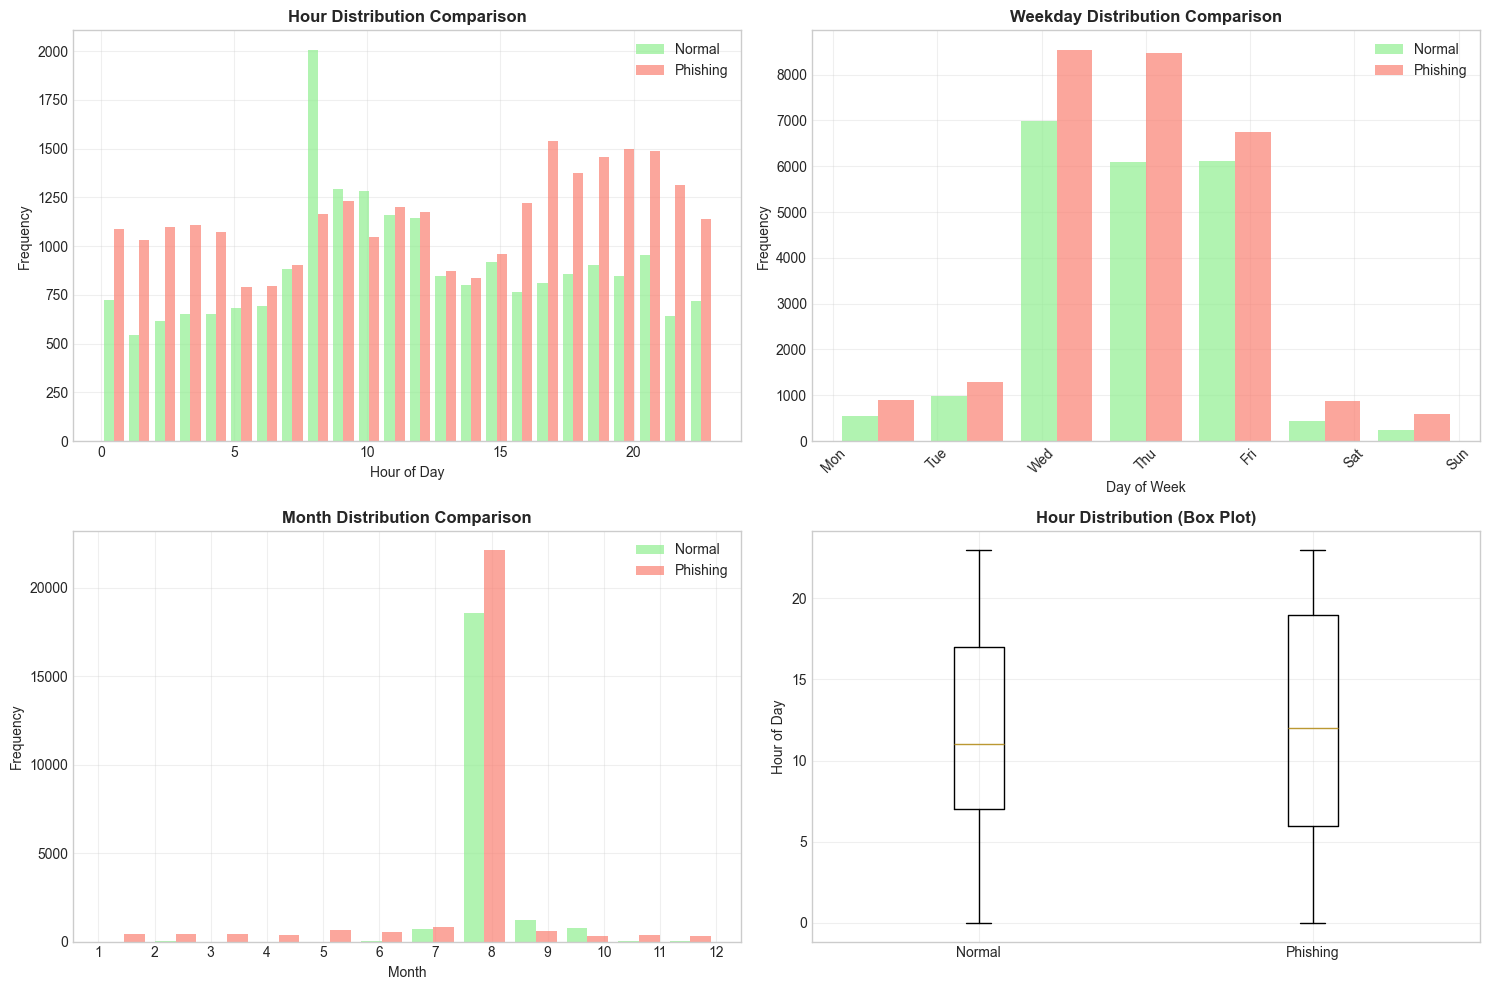

In [34]:
# 5.2 VISUALIZE STATISTICAL COMPARISONS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hour distribution comparison
axes[0, 0].hist([normal['hour'], phishing['hour']], bins=24, 
                label=['Normal', 'Phishing'], color=['lightgreen', 'salmon'], alpha=0.7)
axes[0, 0].set_title('Hour Distribution Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Weekday distribution comparison
axes[0, 1].hist([normal['day_of_week'], phishing['day_of_week']], bins=7, 
                label=['Normal', 'Phishing'], color=['lightgreen', 'salmon'], alpha=0.7)
axes[0, 1].set_title('Weekday Distribution Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(range(0, 7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Month distribution comparison
axes[1, 0].hist([normal['month'], phishing['month']], bins=12, 
                label=['Normal', 'Phishing'], color=['lightgreen', 'salmon'], alpha=0.7)
axes[1, 0].set_title('Month Distribution Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Box plot comparison for hour
axes[1, 1].boxplot([normal['hour'], phishing['hour']], labels=['Normal', 'Phishing'])
axes[1, 1].set_title('Hour Distribution (Box Plot)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Hour of Day')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## 6. Executive Summary

### SPAMMER PROFILE
A typical spammer:
* ✅ **Timezone**: Sends from Middle East/South Asia or APAC timezones (93% spam rate)
* ✅ **Time of Day**: Sends at night/evening (5 PM - 2 AM), especially Hour 22 (10 PM = 67% spam)
* ✅ **Day of Week**: More active on weekends, especially Sunday (71% spam rate) - 12% MORE than weekdays
* ✅ **Volume Pattern**: Sends 1 email then disappears (avg 1.05 emails per sender)
* ✅ **Sender Diversity**: Many unique senders (26,023 vs 4,738 normal)
* ✅ **Temporal Pattern**: Sends in quick bursts (median 1.2 min between emails) then goes silent for months (avg 294 hours)
* ✅ **Burst Behavior**: Avoids high-volume behavior (only 3.4% of burst senders are spammers)

### NORMAL SENDER PROFILE
A typical normal sender:
* ✅ **Timezone**: Sends from Americas or Oceania timezones
* ✅ **Time of Day**: Sends during business hours (8-10 AM), especially Hour 8 (37% spam)
* ✅ **Day of Week**: More active on weekdays, especially Friday
* ✅ **Volume Pattern**: Sends multiple emails (avg 4.52 emails per sender, up to 460)
* ✅ **Sender Diversity**: Fewer unique senders but higher volume per sender
* ✅ **Temporal Pattern**: Sends consistently (median 45 min, avg 21 hours between emails)
* ✅ **Burst Behavior**: High-volume senders are almost always legitimate (96.6%)

---

### KEY DISCRIMINATING FEATURES FOR MODELING

**Strong Spam Indicators:**
1. **Geographic**: Middle East/South Asia timezone
2. **Temporal**: Night/evening hours (22:00, 21:00, 23:00)
3. **Weekly**: Weekend activity, especially Sunday
4. **Sender Volume**: Low email count per sender (1-2 emails)
5. **Burst Pattern**: Rapid succession then long silence

**Strong Legitimate Indicators:**
1. **Geographic**: Americas/Oceania timezone
2. **Temporal**: Business hours (8:00, 9:00, 10:00)
3. **Weekly**: Weekday activity, especially Friday
4. **Sender Volume**: High email count per sender (>10 emails)
5. **Burst Pattern**: Consistent sending intervals

---

### MODELING RECOMMENDATIONS

1. **Temporal Features**: Include hour, day_of_week, is_weekend as features
2. **Sender Behavior**: Create features for emails_per_sender, activity_span, emails_per_day
3. **Regional Features**: Use timezone_region (encode or one-hot)
4. **Burst Detection**: Create features for time_gap statistics (mean, median, std)
5. **Interaction Features**: Consider region × hour, weekday × hour interactions
6. **Volume Threshold**: Use high-volume (>10 emails/day) as strong legitimate signal

In [35]:
features_final = [
    # Original temporal
    'hour',
    'day_of_week', 
    'month',
    'is_weekend',
    
    # Temporal risk scores
    'hour_risk_score',
    'weekday_risk_score',
    
    # Regional
    'timezone_region',
    'region_risk_score',
    'is_middle_east',
    
    # Sender volume
    'sender_total_emails',
    'sender_phishing_rate',
    'is_burst_sender',
    
    # Sender temporal
    'sender_avg_time_gap',
    'sender_time_gap_std',
    
    # Sender newness
    'is_first_email',
    
    # Interaction
    'region_hour_risk',
]